## THE SPARKS FOUNDATION
### GRADUATE ROTATIONAL INTERNSHIP PROGRAM GRIPMAR21
### DATA SCIENCE AND BUSINESS ANALYTICS


### Author: Abdullah Ficici


### Task 2 - Prediction using Unsupervised Machine Learning

**Problem statement:** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Import the Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Read the Data

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Remove the Discrete Variable and Target Variable Columns

In [3]:
iris.drop(['Id', 'Species'],axis='columns',inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Optimum Number of Clusters for KMeans

In [5]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
#wcss= within clusters sum of squares
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

### Elbow Plot

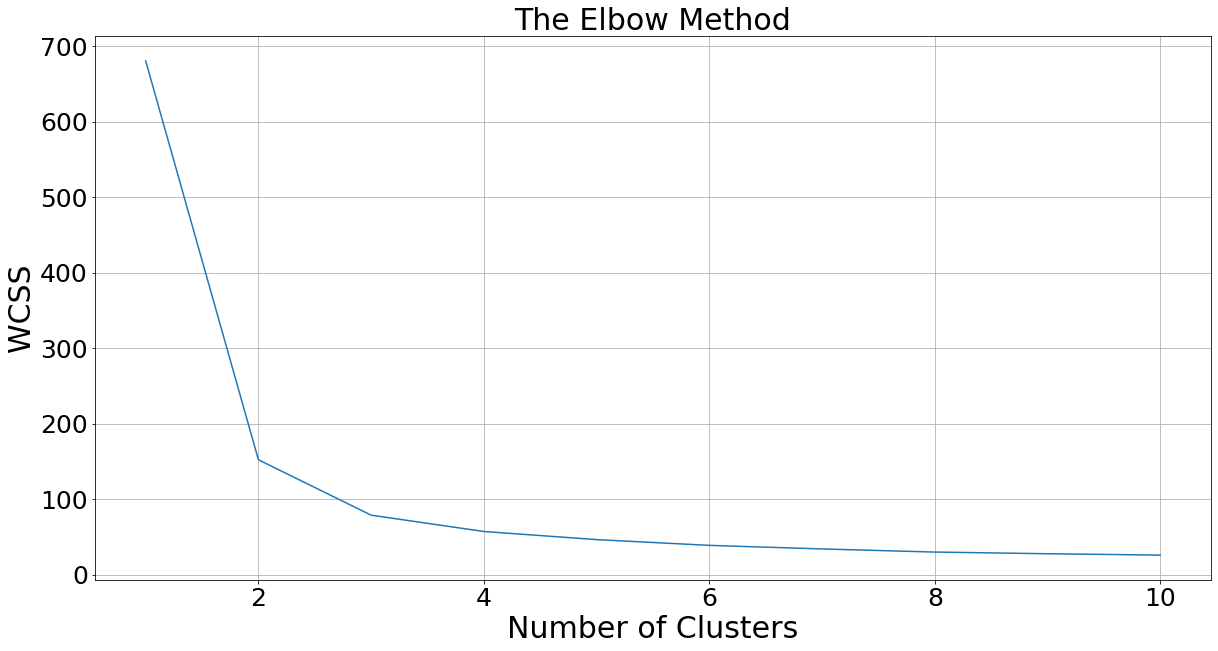

In [23]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize= 30)
plt.xlabel('Number of Clusters', fontsize= 30)
plt.ylabel('WCSS', fontsize= 30) # Within Cluster Sum of Squares
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid()
plt.show()

**Predicted Number of Clusters = 3**

### Apply K-Means to the Dataset

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)

### Visualization of the Results

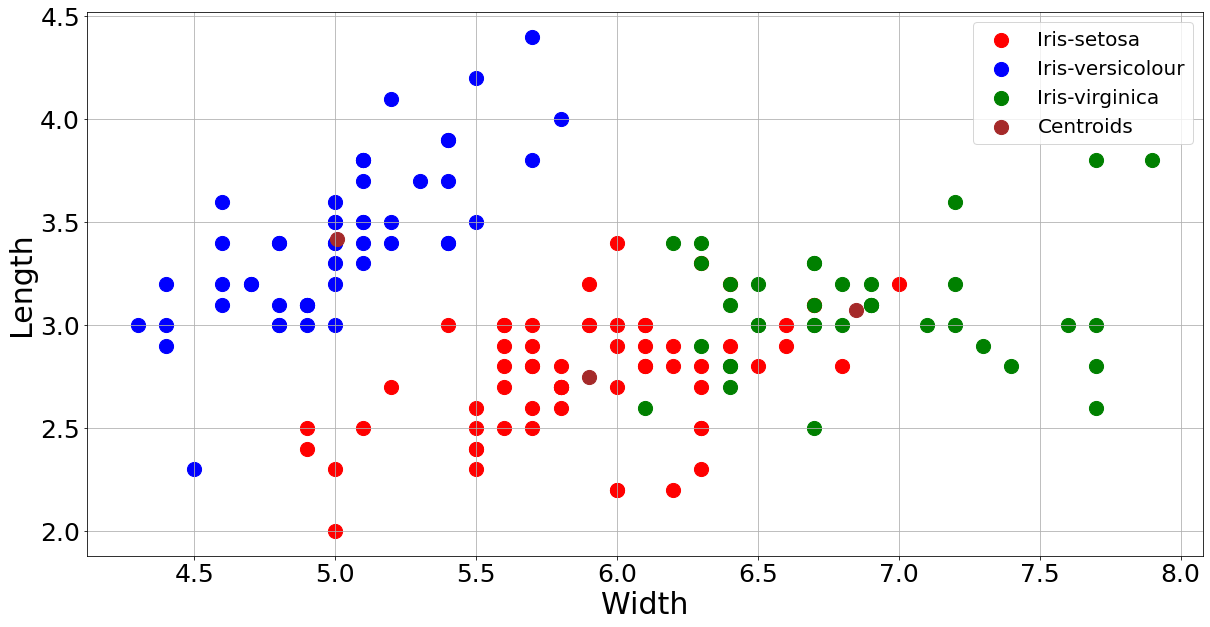

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 200, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 200, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 200, c = 'green', label = 'Iris-virginica')

# Centroids of the Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'brown', label = 'Centroids')
plt.grid()
plt.legend(loc = 'upper right', fontsize=20)
plt.xlabel('Width', fontsize=30)
plt.ylabel('Length', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()